# Linear Regression For Insurence Payment Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
insurance_df = pd.read_csv('insurance.csv')

In [3]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Show the description and the info of the data set.

insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
fitting_data = insurance_df.loc[:, ['age', 'charges']]
pd.to_numeric(fitting_data['age'])
pd.to_numeric(fitting_data['charges'])
print('')

In [7]:
fitting_data.head()

,age,charges
0,19,16884.92400
1,18,1725.55230
2,28,4449.46200
3,33,21984.47061
4,32,3866.85520


<AxesSubplot:xlabel='age', ylabel='charges'>

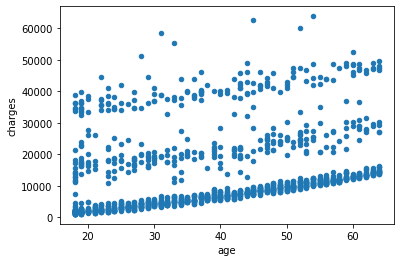

In [8]:
fitting_data.plot.scatter(x = "age", y = "charges", s=None, c=None)

### From the graph, we conclude that there are 3 different lines that need to be fit. we shall do the first one, which means we will take part of the dataset where: 
- ages less than 30  -  who take less than 10000
- ages from 30 to 45  - who take less than 12500
- ages more than 45  - who take less than 18000

In [9]:
# extracting the first linear branch 
fitting_data = fitting_data.loc[((fitting_data["age"] < 30) & (fitting_data["charges"] < 10000)) | ((fitting_data["age"] < 45) & (fitting_data["age"] >= 30) & (fitting_data["charges"] < 11500)) | ((fitting_data["age"] >= 45) & (fitting_data["charges"] < 17500)) ]

<AxesSubplot:xlabel='age', ylabel='charges'>

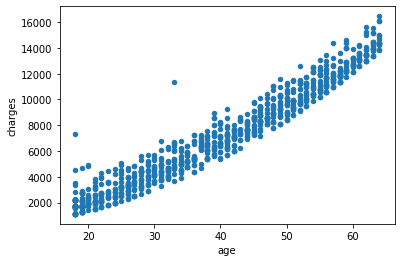

In [10]:
# plotting the extracted data 
fitting_data.plot.scatter(x = "age", y = "charges", s=None, c=None)

## Now it is the time for linear regression

In [11]:
x_train, x_test, y_train, y_test = train_test_split(fitting_data["age"].values,fitting_data["charges"].values, train_size = 0.8, test_size = 0.2, random_state = 80)
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [12]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [13]:
y_predict = model.predict(x_test)

Text(0, 0.5, 'charges')

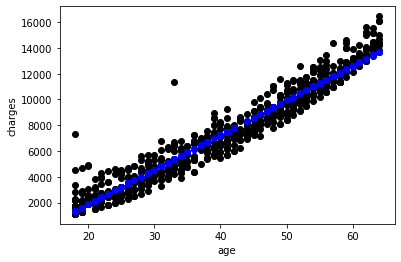

In [14]:
%matplotlib inline
plt.scatter(x_train,y_train,color='black')
plt.scatter(x_test,y_predict,color='blue')
plt.xlabel('age')
plt.ylabel('charges')

### We notice the linear correlation between the age and charges in the sub-dataset

Text(0, 0.5, 'charges')

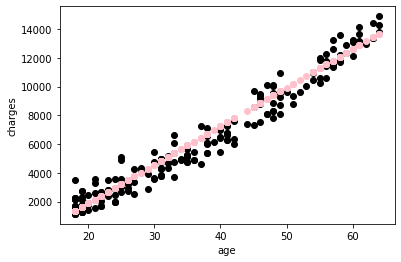

In [15]:
%matplotlib inline
plt.scatter(x_test,y_test,color='black')
plt.scatter(x_test,y_predict,color='pink')
plt.xlabel('age')
plt.ylabel('charges')

### and notice the accurecy of prediction for the test y
### finding the accurecy:

In [16]:
model.score(x_train, y_train)

0.9466775732685362

In [17]:
model.score(x_test, y_test)

0.9564596393903326

### Which is close to being accurate

I think that the reason of the correlation is the fact that one gets more diseases when getting older, therefore the charges increase. 